# INDUSTRIAL COPPER MODELING

In [1]:
#library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelBinarizer
from sklearn.metrics import  classification_report, roc_curve, auc
#To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset from the link
data = 'https://docs.google.com/spreadsheets/d/18eR6DBe5TMWU9FnIewaGtsepDbV4BOyr/export?format=csv'
df = pd.read_csv(data)
df

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.4824216,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.0864686,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235593568,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00


In [3]:
df.shape

(181673, 14)

In [4]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [6]:
df.describe()

,item_date,customer,country,application,thickness,width,product_ref,delivery date,selling_price
count,1.816720e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816720e+05,1.816720e+05
mean,2.020459e+07,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,2.020738e+07,1.918036e+03
std,4.551119e+03,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,2.411059e+04,3.317956e+05
min,1.995000e+07,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,2.019040e+07,-1.160000e+03
25%,2.020093e+07,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,2.020110e+07,6.690000e+02
50%,2.020113e+07,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,2.021010e+07,8.120000e+02
75%,2.021020e+07,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,2.021040e+07,9.530000e+02
max,2.021040e+07,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,3.031010e+07,1.000010e+08


In [7]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
181668    False
181669    False
181670    False
181671    False
181672    False
Length: 181673, dtype: bool

In [8]:
#To view the column names
df.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

In [9]:
# dealing with data in wrong format

df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
df['customer'] = pd.to_numeric(df['customer'], errors='coerce')
df['country'] = pd.to_numeric(df['country'], errors='coerce')
df['application'] = pd.to_numeric(df['application'], errors='coerce')
df['thickness'] = pd.to_numeric(df['thickness'], errors='coerce')
df['width'] = pd.to_numeric(df['width'], errors='coerce')
df['material_ref'] = df['material_ref'].str.lstrip('0')
df['product_ref'] = pd.to_numeric(df['product_ref'], errors='coerce')
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')

In [10]:
#Dealing with missing value
df.isnull().sum()

id                   2
item_date            3
quantity tons        1
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        3
selling_price        1
dtype: int64

In [11]:
# material_ref has large set of null values, so replacing them with unknown 
df['material_ref'].fillna('unknown', inplace=True)
# deleting the remaining null values as they are less than 1% of data which can be neglected
df = df.dropna()

In [12]:
#Dealing with missing value
df.isnull().sum()

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [13]:
df1=df.copy()

In [14]:
from scipy.stats import skew
import numpy as np

print('Skewness:', skew(np.nan_to_num(df1['quantity tons'])))
print('Skewness:', skew(np.nan_to_num(df1['country'])))
print('Skewness:', skew(np.nan_to_num(df1['application'])))
print('Skewness:', skew(np.nan_to_num(df1['thickness'])))
print('Skewness:', skew(np.nan_to_num(df1['width'])))
print('Skewness:', skew(np.nan_to_num(df1['selling_price'])))


Skewness: 424.63821570967093
Skewness: 0.7535772823154291
Skewness: 0.7243181557106211
Skewness: 303.46908538522666
Skewness: 0.37484155989536533
Skewness: 301.35075873520265


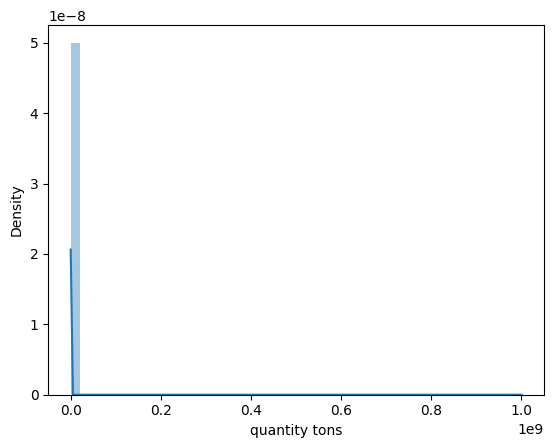

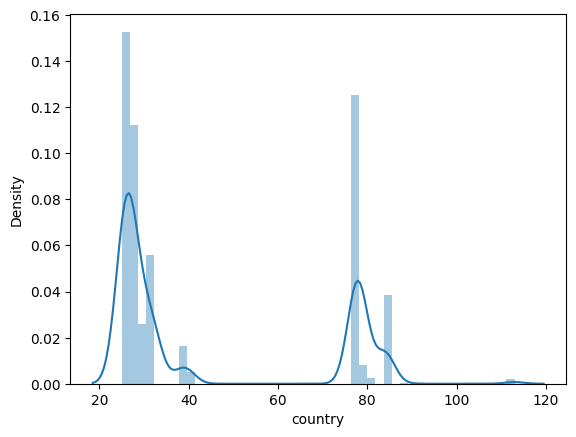

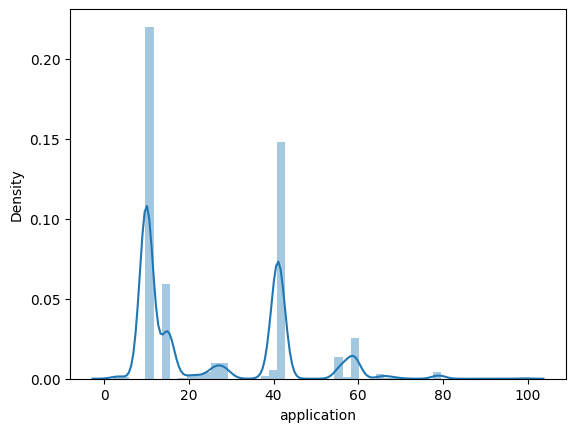

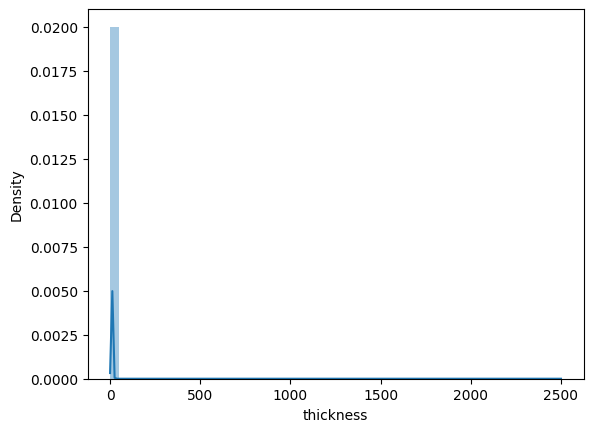

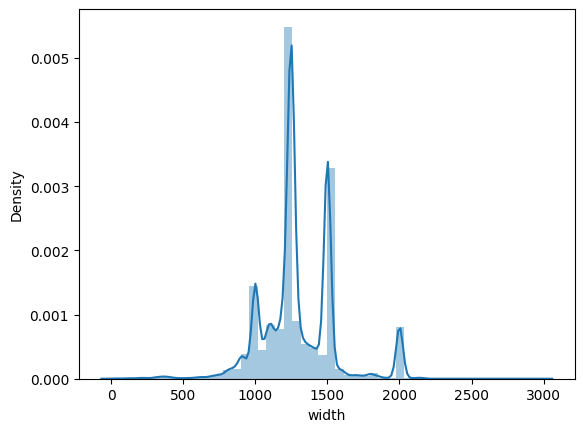

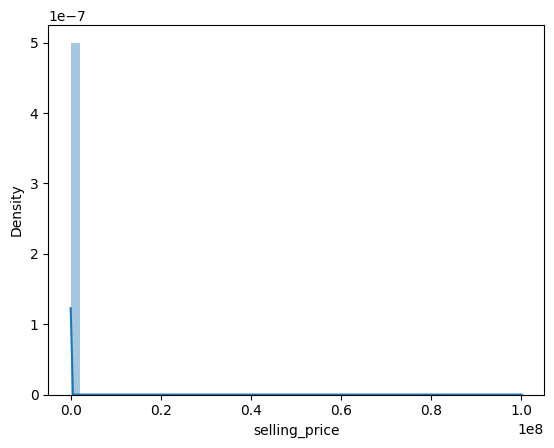

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(df1['quantity tons'])
plt.show()
sns.distplot(df1['country'])
plt.show()
sns.distplot(df1['application'])
plt.show()
sns.distplot(df1['thickness'])
plt.show()
sns.distplot(df1['width'])
plt.show()
sns.distplot(df1['selling_price'])
plt.show()


In [16]:
import numpy as np
mask1 = df1['selling_price'] <= 0
print(mask1.sum())
df1.loc[mask1, 'selling_price'] = np.nan

mask1 = df1['quantity tons'] <= 0
print(mask1.sum())
df1.loc[mask1, 'quantity tons'] = np.nan

mask1 = df['thickness'] <= 0
print(mask1.sum())
df1.loc[mask1, 'thickness'] = np.nan

7
4
0


In [17]:
import numpy as np

df1['selling_price'] = df1['selling_price'].replace(0, np.nan)
df1['quantity tons'] = df1['quantity tons'].replace(0, np.nan)
df1['thickness'] = df1['thickness'].replace(0, np.nan)


In [18]:
df1.isnull().sum()

id               0
item_date        0
quantity tons    4
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    7
dtype: int64

In [19]:
df1.dropna(inplace=True)
len(df1)

181620

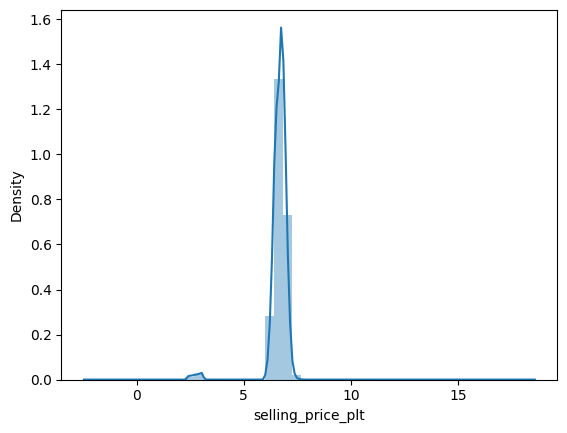

Skewness: -5.342755228594173


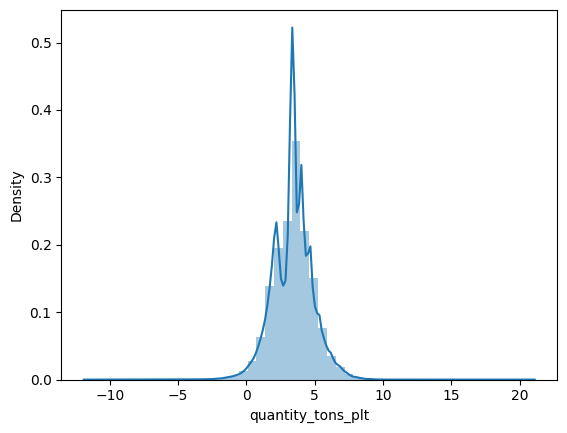

Skewness: -0.06876938489401442


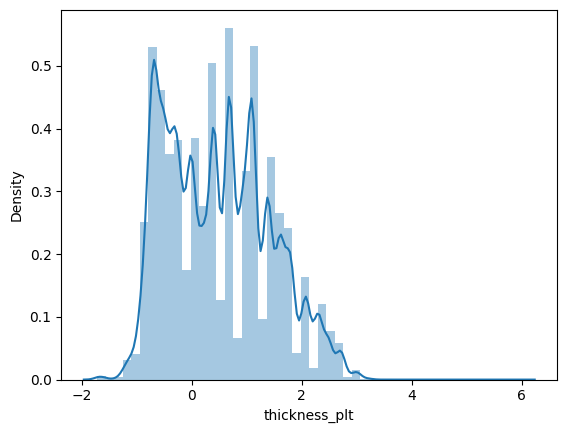

Skewness: 0.3491224330194453


In [20]:
import numpy as np
df1['selling_price_plt'] = np.log(df1['selling_price'])
sns.distplot(df1['selling_price_plt'])
plt.show()
print('Skewness:', skew(df1['selling_price_plt']))

df1['quantity_tons_plt'] = np.log(df1['quantity tons'])
sns.distplot(df1['quantity_tons_plt'])
plt.show()
print('Skewness:', skew(df1['quantity_tons_plt']))

df1['thickness_plt'] = np.log(df1['thickness'])
sns.distplot(df1['thickness_plt'])
plt.show()
print('Skewness:', skew(df1['thickness_plt']))


# EDA

# DATA VISUALIZATION

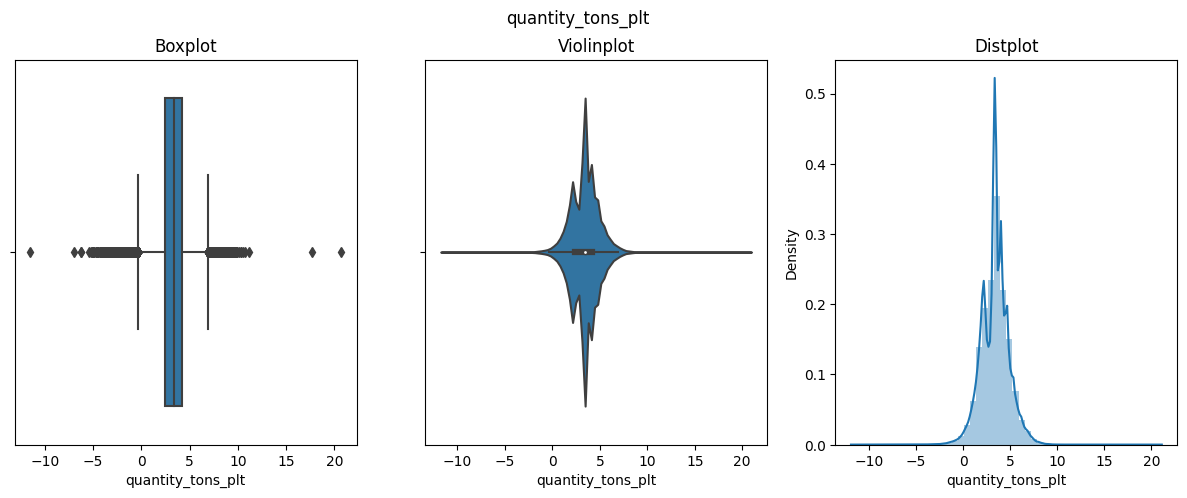

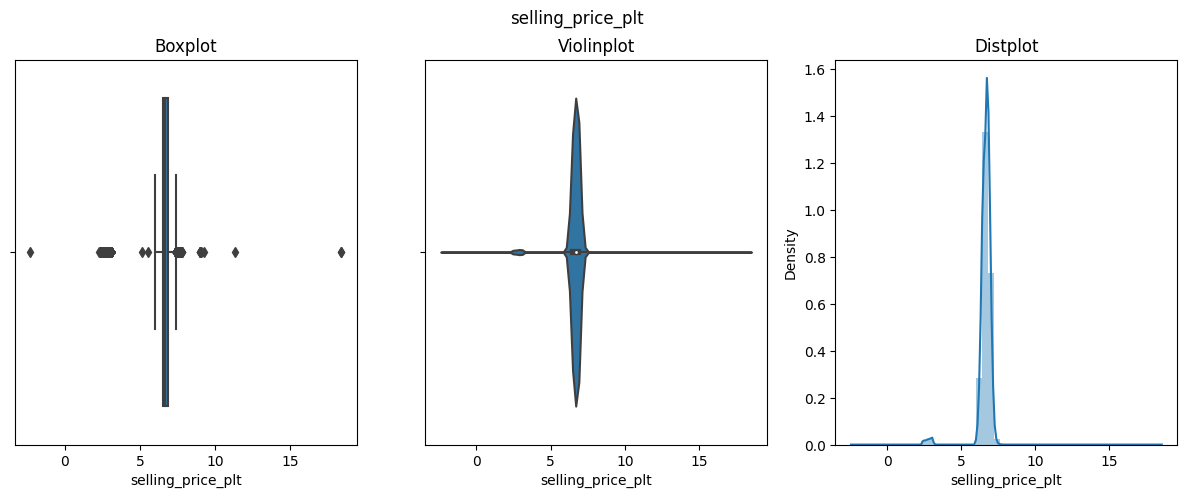

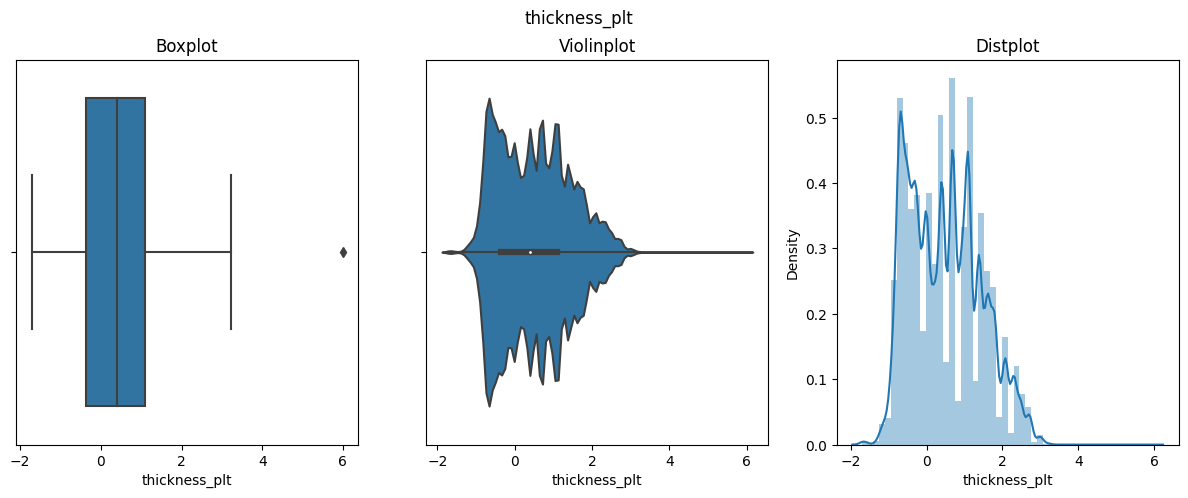

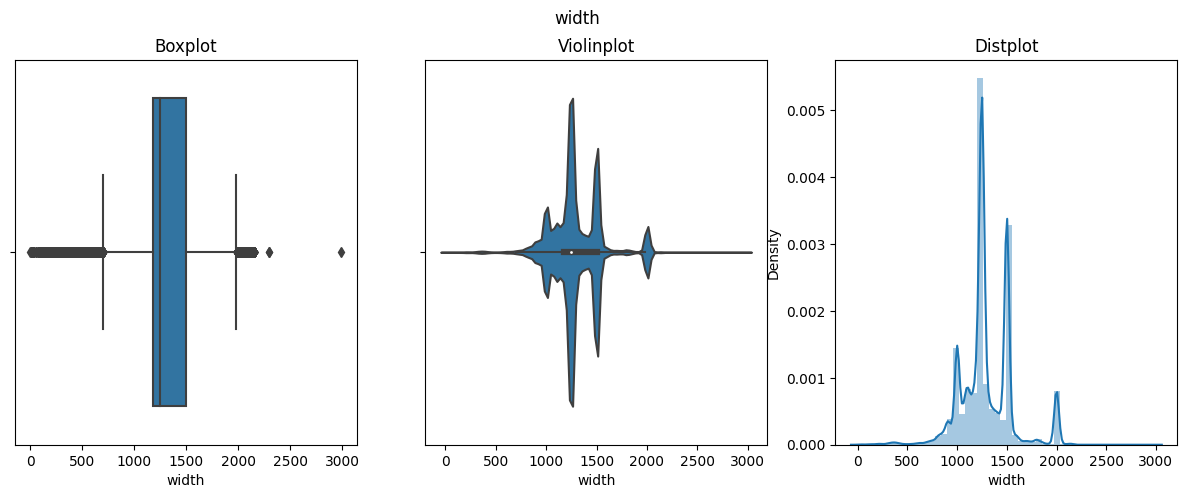

In [21]:
#visualize skewness using boxplot, violinplot, and distplot after transformation
import seaborn as sns
import matplotlib.pyplot as plt
cols = ['quantity_tons_plt', 'selling_price_plt', 'thickness_plt', 'width'] 
for col in cols:
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(col)

    # boxplot
    sns.boxplot(x=df1[col], ax=ax[0])
    ax[0].set_title('Boxplot')

    # violinplot
    sns.violinplot(x=df1[col], ax=ax[1])
    ax[1].set_title('Violinplot')

    # distplot
    sns.distplot(df1[col], ax=ax[2])
    ax[2].set_title('Distplot')

    plt.show()

<Axes: >

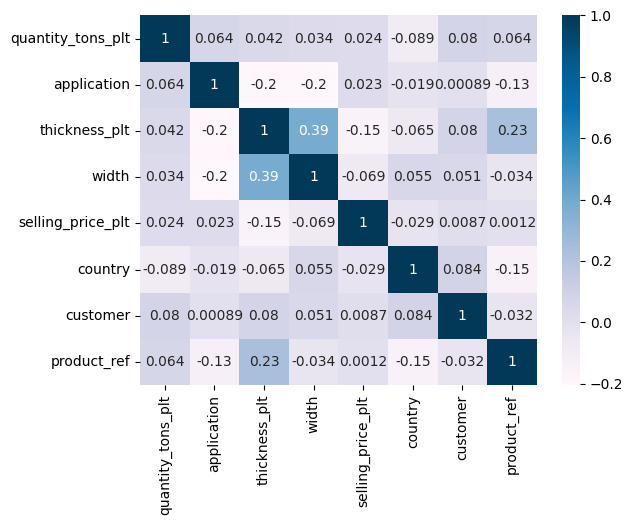

In [22]:
x=df1[['quantity_tons_plt','application','thickness_plt','width','selling_price_plt','country','customer','product_ref']].corr()
sns.heatmap(x, annot=True, cmap="PuBu")


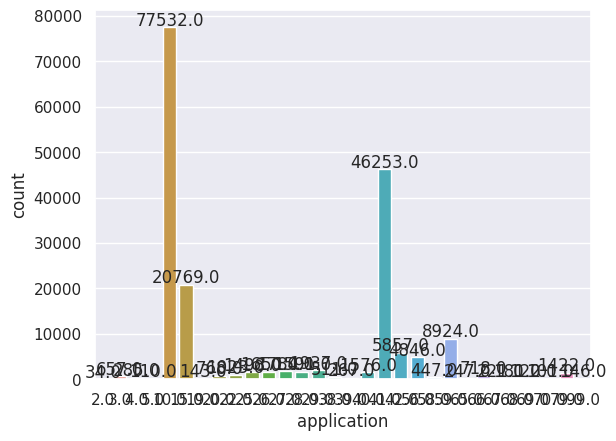

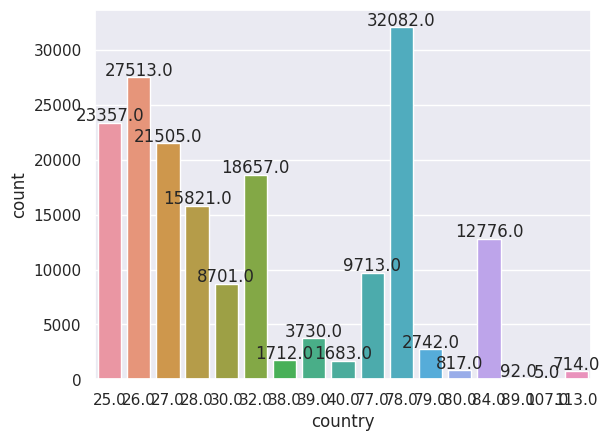

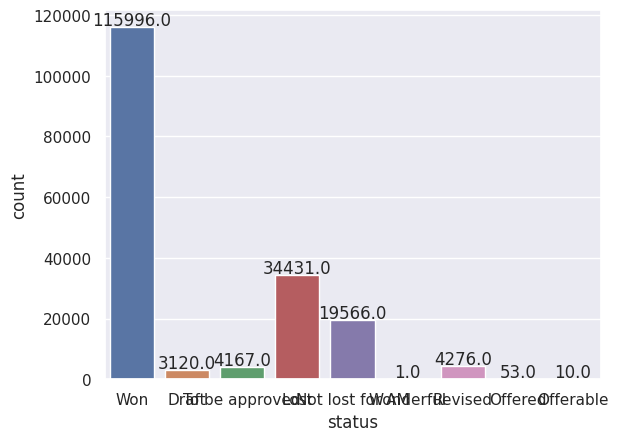

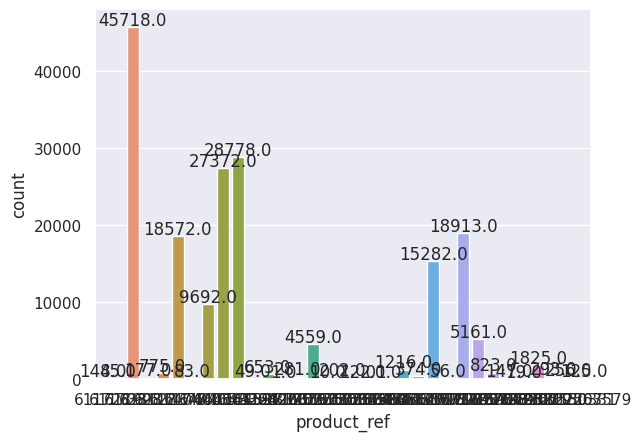

In [23]:
sns.set(style="darkgrid")
ax = sns.countplot(x="application", data=df1)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()
sns.set(style="darkgrid")

ax = sns.countplot(x="country", data=df1)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

ax = sns.countplot(x="status", data=df1)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

ax = sns.countplot(x="product_ref", data=df1)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()


DECISION TREE REGRESSOR

In [24]:
# X & y 
X=df1[['quantity_tons_plt','status','item type','application','thickness_plt','width','country','customer','product_ref']]
y=df1['selling_price_plt']

In [25]:
# encoding categorical variables
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X[['item type']])
X_ohe = ohe.fit_transform(X[['item type']]).toarray()
ohe2 = OneHotEncoder(handle_unknown='ignore')
ohe2.fit(X[['status']])
X_be = ohe2.fit_transform(X[['status']]).toarray()
# independent features after encoding
X = np.concatenate((X[['quantity_tons_plt', 'application', 'thickness_plt', 'width','country','customer','product_ref']].values, X_ohe, X_be), axis=1)

In [26]:
# test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [27]:
#scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
dtr = DecisionTreeRegressor()
# hyperparameters
param_grid = {'max_depth': [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}
# gridsearchcv
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
# evalution metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)

Best hyperparameters: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10}
Mean squared error: 0.0246030869705217
R-squared: 0.9249886593030646


In [29]:
new_sample = np.array([[np.log(40), 10, np.log(250), 0, 28,30202938,1670798778,'PL','Won']])
new_sample_ohe = ohe.transform(new_sample[:, [7]]).toarray()
new_sample_be = ohe2.transform(new_sample[:, [8]]).toarray()
new_sample = np.concatenate((new_sample[:, [0,1,2, 3, 4, 5, 6,]], new_sample_ohe, new_sample_be), axis=1)
new_sample1 = scaler.transform(new_sample)
new_pred = best_model.predict(new_sample1)
print('Predicted selling price:', np.exp(new_pred))

Predicted selling price: [628.28578452]


In [30]:
# Saving the model
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('t.pkl', 'wb') as f:
    pickle.dump(ohe, f)
with open('s.pkl', 'wb') as f:
    pickle.dump(ohe2, f)

In [31]:
print(len(df1))
df1.head(3)

181620


,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,selling_price_plt,quantity_tons_plt,thickness_plt
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,6.749931,3.991779,0.693147
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00,6.953684,6.643822,-0.223144
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33,6.468211,5.956169,-0.967584


In [32]:
df2 = df1[df1['status'].isin(['Won', 'Lost'])]
len(df2)

150427

# DECISION TREE CLASSIFIER

In [33]:
## X & y
X= df2[['quantity_tons_plt','selling_price_plt','item type','application','thickness_plt','width','country','customer','product_ref']]
Y = df2['status']

In [34]:
# encoding categorical variables
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X[['item type']])
X_ohe = ohe.fit_transform(X[['item type']]).toarray()
be = LabelBinarizer()
be.fit(Y) 
y = be.fit_transform(Y)
# independent features after encoding
X = np.concatenate((X[['quantity_tons_plt', 'selling_price_plt','application', 'thickness_plt', 'width','country','customer','product_ref']].values, X_ohe), axis=1)

In [35]:
# test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [36]:
#Scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
#model
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

Accuracy: 0.9117529748055574
Confusion Matrix:
[[ 5730  1292]
 [ 1363 21701]]


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.82      0.81      7022
           1       0.94      0.94      0.94     23064

    accuracy                           0.91     30086
   macro avg       0.88      0.88      0.88     30086
weighted avg       0.91      0.91      0.91     30086



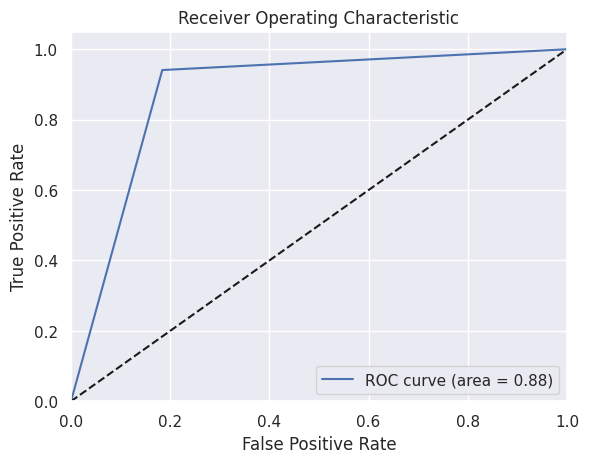

In [38]:
from sklearn.metrics import roc_auc_score, roc_curve

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# ROC curve and AUC
roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [39]:
#predicting for new sample
new_sample = np.array([[np.log(630), np.log(986), 41, np.log(2),1200,25.0,30202938,1670798778,'W']])
new_sample_ohe = ohe.transform(new_sample[:, [8]]).toarray()
new_sample = np.concatenate((new_sample[:, [0,1,2, 3, 4, 5, 6,7]], new_sample_ohe), axis=1)
new_sample = scaler.transform(new_sample)
new_pred = dtc.predict(new_sample)
if new_pred==1:
    print('The status is: Won')
else:
    print('The status is: Lost')

The status is: Won


In [40]:
# Saving the model
import pickle
with open('cmodel.pkl', 'wb') as file:
    pickle.dump(dtc, file)
with open('cscaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('ct.pkl', 'wb') as f:
    pickle.dump(ohe, f)

# MODEL PREDECTION

In [ ]:
!pip install Streamlit

In [46]:
!pip install pyngrok

In [47]:
! ngrok config add-authtoken 2P0LznujREuShZx0WUKVWjMFlpN_2z2P1e8CFMWZ6Sjz32TJP

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [48]:
!./ngrok authtokens 2P0LznujREuShZx0WUKVWjMFlpN_2z2P1e8CFMWZ6Sjz32TJP

/bin/bash: ./ngrok: No such file or directory


In [50]:
from pyngrok import ngrok 

In [65]:
%%writefile cdapp.py
import streamlit as st
import numpy as np
import pandas as pd
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer

# Load the saved models and preprocessing objects
regression_model = pickle.load(open('model.pkl', 'rb'))
classification_model = pickle.load(open('cmodel.pkl', 'rb'))
regression_scaler = pickle.load(open('scaler.pkl', 'rb'))
classification_scaler = pickle.load(open('cscaler.pkl', 'rb'))
regression_encoder = pickle.load(open('t.pkl', 'rb'))
classification_encoder = pickle.load(open('ct.pkl', 'rb'))

# Function to preprocess the input data based on the model type
def preprocess_input(input_data, model_type):
    if model_type == 'Regression':
        # Perform feature engineering, scaling, and transformation
        input_data['quantity_tons_plt'] = np.log(input_data['quantity tons'])
        input_data['thickness_plt'] = np.log(input_data['thickness'])
        input_data = input_data[['quantity_tons_plt', 'application', 'thickness_plt', 'width', 'country', 'customer', 'product_ref']]
        input_data = regression_encoder.transform(input_data)
        input_data = regression_scaler.transform(input_data)
        return input_data

    elif model_type == 'Classification':
        # Perform feature engineering, scaling, and transformation
        input_data['quantity_tons_plt'] = np.log(input_data['quantity tons'])
        input_data['selling_price_plt'] = np.log(input_data['selling_price'])
        input_data = input_data[['quantity_tons_plt', 'selling_price_plt', 'application', 'thickness_plt', 'width', 'country', 'customer', 'product_ref']]
        input_data = classification_encoder.transform(input_data)
        input_data = classification_scaler.transform(input_data)
        return input_data


# Streamlit app
st.title('Model Prediction')

# Task input: Regression or Classification
task = st.selectbox('Select the task', ['Regression', 'Classification'])

# Input field for entering column values
quantity_tons = st.number_input('Enter quantity tons')
application = st.text_input('Enter application')
thickness = st.number_input('Enter thickness')
width = st.number_input('Enter width')
country = st.number_input('Enter country')
customer = st.number_input('Enter customer')
product_ref = st.number_input('Enter product ref')

# Create a dictionary with the input data
input_data = {
    'quantity tons': quantity_tons,
    'application': application,
    'thickness': thickness,
    'width': width,
    'country': country,
    'customer': customer,
    'product_ref': product_ref
}

# Create a DataFrame from the input data
input_df = pd.DataFrame(input_data, index=[0])

# Preprocess the input data
processed_input = preprocess_input(input_df, task)

# Make predictions based on the model type
if task == 'Regression':
    prediction = regression_model.predict(processed_input)
    st.write('Predicted selling price:', np.exp(prediction))
else:
    prediction = classification_model.predict(processed_input)
    if prediction == 1:
        st.write('The status is: Won')
    else:
        st.write('The status is: Lost')



Overwriting cdapp.py


In [67]:
!streamlit run /content/cdapp.py & npx localtunnel -p 8501




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://104.196.59.24:8501

  Stopping...
^C
